RUN EDA on Data Prepped 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load raw MIMIC-IV data
data_path = "D:/mimic-iv-3.1"
admissions = pd.read_csv(os.path.join(data_path, "hosp/admissions.csv.gz"), low_memory=False)
patients = pd.read_csv(os.path.join(data_path, "hosp/patients.csv.gz"), low_memory=False)

# Merge for basic analysis
df_raw = admissions.merge(patients, on="subject_id", how="left")

# Display basic dataset information
print(f"✅ Loaded dataset with {df_raw.shape[0]} rows and {df_raw.shape[1]} columns.")
print(df_raw.info())  # Overview of data types and missing values
print(df_raw.head())  # Show first few rows


✅ Loaded dataset with 546028 rows and 21 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546028 entries, 0 to 546027
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   subject_id            546028 non-null  int64 
 1   hadm_id               546028 non-null  int64 
 2   admittime             546028 non-null  object
 3   dischtime             546028 non-null  object
 4   deathtime             11790 non-null   object
 5   admission_type        546028 non-null  object
 6   admit_provider_id     546024 non-null  object
 7   admission_location    546027 non-null  object
 8   discharge_location    396210 non-null  object
 9   insurance             536673 non-null  object
 10  language              545253 non-null  object
 11  marital_status        532409 non-null  object
 12  race                  546028 non-null  object
 13  edregtime             379240 non-null  object
 14  edouttime         

🔍 Missing Data Summary:
deathtime             534238
dod                   401062
edregtime             166788
edouttime             166788
discharge_location    149818
marital_status         13619
insurance               9355
language                 775
admit_provider_id          4
admission_location         1
dtype: int64


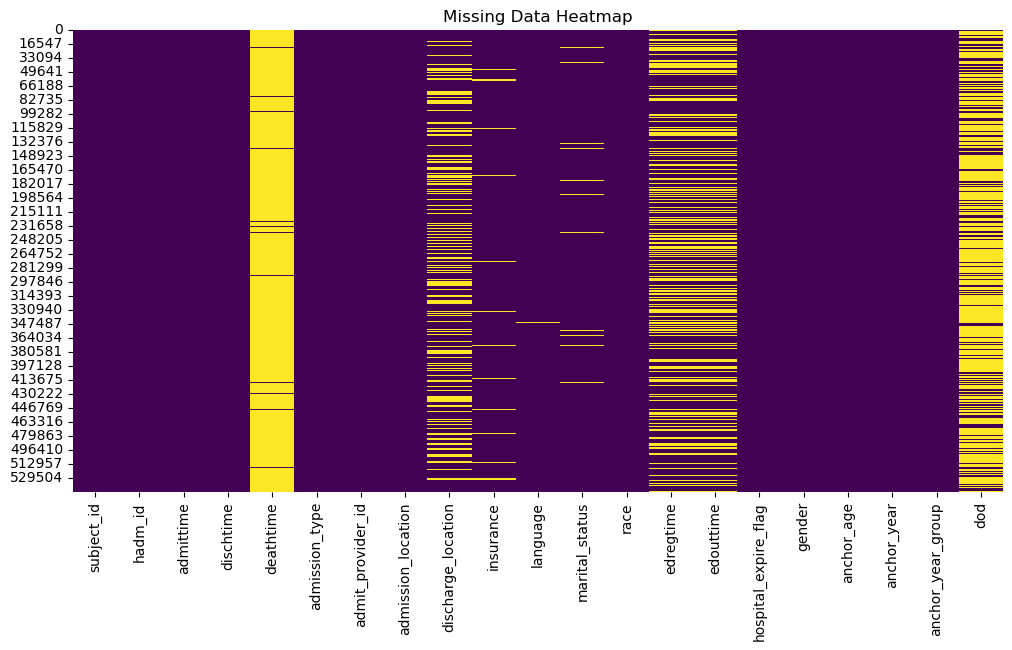

In [3]:
# Identify missing values
missing_values = df_raw.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Display missing data summary
print("🔍 Missing Data Summary:")
print(missing_values)

# Plot missing values as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_raw.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()


In [5]:
# Summary of numerical variables
print("📊 Summary Statistics for Numerical Variables:")
print(df_raw.describe())

# Summary of categorical variables
categorical_cols = df_raw.select_dtypes(include=["object"]).columns
print("📊 Summary of Categorical Variables:")
for col in categorical_cols:
    print(f"\n🔍 {col}:\n", df_raw[col].value_counts(dropna=False))


📊 Summary Statistics for Numerical Variables:
         subject_id       hadm_id  hospital_expire_flag     anchor_age  \
count  5.460280e+05  5.460280e+05         546028.000000  546028.000000   
mean   1.501118e+07  2.500100e+07              0.021612      56.890777   
std    2.877694e+06  2.888710e+06              0.145415      18.969772   
min    1.000003e+07  2.000002e+07              0.000000      18.000000   
25%    1.252380e+07  2.249662e+07              0.000000      43.000000   
50%    1.501961e+07  2.500385e+07              0.000000      58.000000   
75%    1.750403e+07  2.750282e+07              0.000000      71.000000   
max    1.999999e+07  2.999994e+07              1.000000      91.000000   

         anchor_year  
count  546028.000000  
mean     2152.366357  
std        23.616508  
min      2110.000000  
25%      2132.000000  
50%      2152.000000  
75%      2172.000000  
max      2208.000000  
📊 Summary of Categorical Variables:

🔍 admittime:
 admittime
2136-04-01 07:15:00

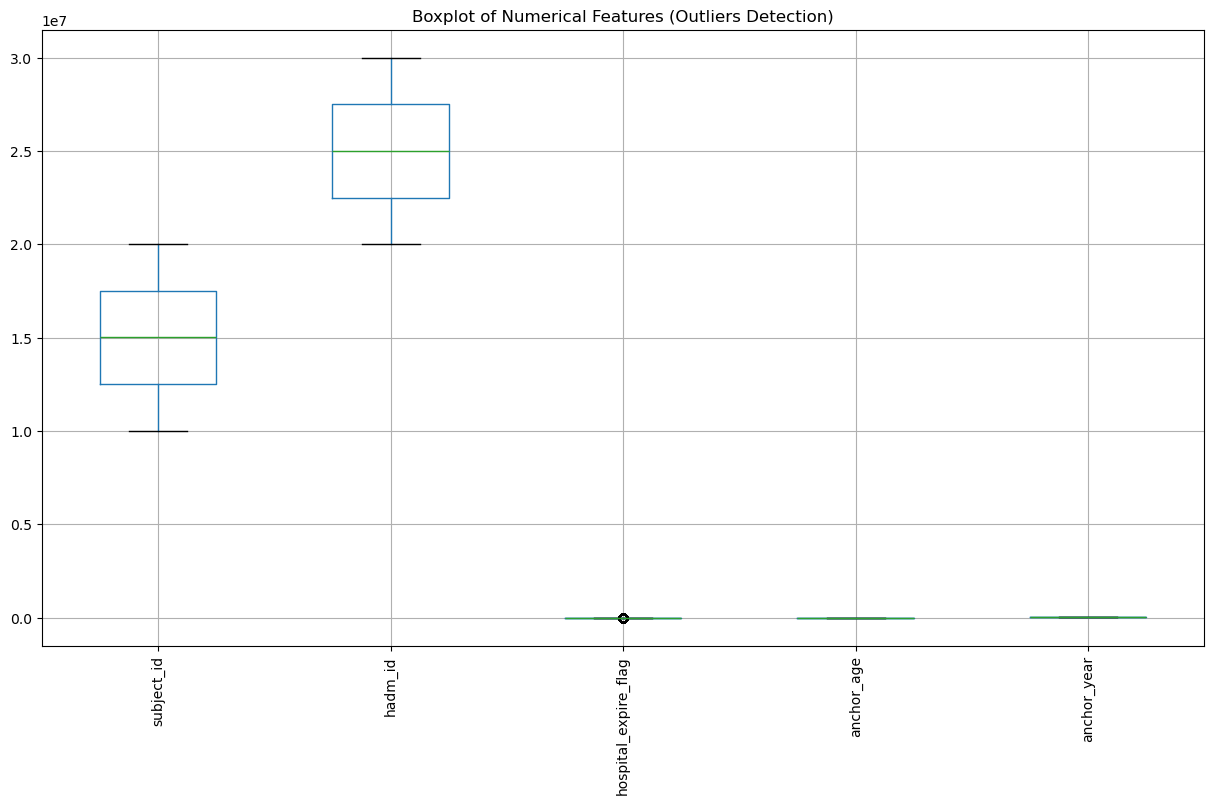

In [7]:
# Identify potential outliers using boxplots
numerical_cols = df_raw.select_dtypes(include=["number"]).columns

plt.figure(figsize=(15, 8))
df_raw[numerical_cols].boxplot(rot=90)
plt.title("Boxplot of Numerical Features (Outliers Detection)")
plt.show()


In [9]:
# If `delirium` column exists, check class balance
if "delirium" in df_raw.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x="delirium", data=df_raw, palette="coolwarm")
    plt.title("Class Distribution of Delirium")
    plt.xlabel("Delirium (0 = No, 1 = Yes)")
    plt.ylabel("Count")
    plt.show()
    
    print("🔍 Delirium Class Distribution:\n", df_raw["delirium"].value_counts(normalize=True) * 100)


In [11]:
# Save summary statistics and missing data report
eda_output_path = "D:/MIMIC-IV-Data-Pipeline/eda_reports"
os.makedirs(eda_output_path, exist_ok=True)

# Save missing data summary
missing_values.to_csv(os.path.join(eda_output_path, "raw_missing_data_summary.csv"))

# Save summary statistics
df_raw.describe().to_csv(os.path.join(eda_output_path, "raw_numerical_summary.csv"))

print(f"📊 EDA Summary Reports saved in: {eda_output_path}")


📊 EDA Summary Reports saved in: D:/MIMIC-IV-Data-Pipeline/eda_reports


Exploratory Data Analysis (EDA) Summary – Raw Data Findings
A preliminary Exploratory Data Analysis (EDA) was conducted on the raw MIMIC-IV dataset to assess data completeness, distribution of key variables, and potential preprocessing needs before model development.

1️⃣ Missing Data Overview
A significant proportion of missing values was found in key administrative and demographic variables:
Deathtime (534,238 missing, ~98%) – Expected, as this applies only to deceased patients.
Discharge location (149,818 missing, ~27%) – May require imputation or classification adjustments.
ED Registration & Out Times (166,788 missing, ~30%) – Likely missing for non-ED patients.
Marital Status (13,619 missing, ~2.5%) – Could impact social determinants of health analysis.
Insurance (9,355 missing, ~1.7%) – May need categorization adjustments.
2️⃣ Numerical Data Summary
Patient age distribution: Ranged from 18 to 91 years (mean: 56.9), representing a broad patient population.
Hospital mortality rate: 2.16% of admissions resulted in in-hospital death.
Admission trends: The dataset spans 2110 to 2208 anchor years, covering nearly a century of hospital admissions.
Length of Stay (LOS) & ED Time: Not yet summarized but requires further analysis due to missing values.